# ImageNet in 15 minutes notes

In [3]:
def downloadFile(URL=None):
    import httplib2
    h = httplib2.Http(".cache")
    resp, content = h.request(URL, "GET")
    return content
log_url="https://s3.amazonaws.com/yaroslavvb/logs/data/training/nv/2018-07-27_07-19-baseline-single-ami12-w8/full.log"
log=downloadFile(log_url).decode('ascii')
import re
times_ms = [1000*float(x) for x in re.findall("Time ([.0-9]+)", log)]

## Timing data for original run

python launch_nv.py --name $name --ami-name="$ami" --zone=$zone  --num-tasks 1 --attach-volume imagenet_high_perf

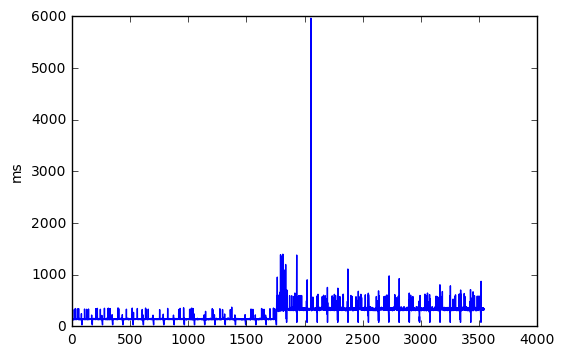

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(times_ms)
plt.ylabel('ms')

In [ ]:
Batch-size 192, nvidia-smi around 85

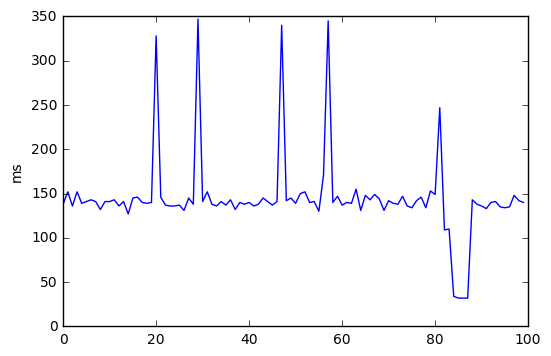

In [5]:
plt.plot(times_ms[:100])
plt.ylabel('ms')

# scratch

In [6]:
# Get in/out bytes from /proc/net/dev
def network_bytes():
  import subprocess
  proc = subprocess.Popen(['cat', '/proc/net/dev'], stdout=subprocess.PIPE)
  stdout,stderr = proc.communicate()
  stdout=stdout.decode('ascii')

  recv_bytes = 0
  transmit_bytes = 0
  lines=stdout.strip().split('\n')
  lines = lines[2:]  # strip header
  for line in lines[2:]:
    line = line.strip()
    # ignore loopback interface
    if line.startswith('lo'):
      continue
    toks = line.split()

    recv_bytes += int(toks[1])
    transmit_bytes += int(toks[9])
  return recv_bytes, transmit_bytes


In [7]:
network_bytes()

(0, 0)

In [18]:
yaro = [
  '--lr-sched', '0.14,0.47,0.78,0.95',
  '--epochs', 45,
  '--lr', 0.4,
  '--dist-url', 'file:///home/ubuntu/data/file.sync', # single instances are faster with file sync
  '--init-bn0',
  '--batch-sched', 64,
  '--num-tasks', 1
]

In [11]:
[v for v in yaro if v=='--num-tasks']

['--num-tasks']

In [12]:
yaro

['--lr-sched',
 '0.14,0.47,0.78,0.95',
 '--epochs',
 45,
 '--lr',
 0.4,
 '--dist-url',
 'file:///home/ubuntu/data/file.sync',
 '--init-bn0',
 '--batch-sched',
 64,
 '--num-tasks',
 1]

In [17]:
len(yaro)

12

In [19]:
del yaro[12], yaro[11]

In [20]:
yaro

['--lr-sched',
 '0.14,0.47,0.78,0.95',
 '--epochs',
 45,
 '--lr',
 0.4,
 '--dist-url',
 'file:///home/ubuntu/data/file.sync',
 '--init-bn0',
 '--batch-sched',
 64]